Based on https://barnesanalytics.com/basics-of-arima-models-with-statsmodels-in-python

In [1]:
import pandas as pd

In [13]:
!ls

 ARIMAX.ipynb						    salesdata.csv
'Basics of ARIMA Models With Statsmodels in Python.ipynb'   statsmodels.ipynb
 salesdata2.csv


In [14]:
df = pd.read_csv("salesdata.csv")

In [16]:
df = df[["Date", "Sales"]]

In [17]:
df

,Date,Sales
0,01/01/07,4600
1,02/01/07,5700
2,03/01/07,6800
3,04/01/07,7900
4,05/01/07,9000
...,...,...
115,08/01/16,17600
116,09/01/16,18700
117,10/01/16,19800
118,11/01/16,20900


In [18]:
df.index = pd.to_datetime(df["Date"])

In [19]:
df

,Date,Sales
Date,,
2007-01-01,01/01/07,4600
2007-02-01,02/01/07,5700
2007-03-01,03/01/07,6800
2007-04-01,04/01/07,7900
2007-05-01,05/01/07,9000
...,...,...
2016-08-01,08/01/16,17600
2016-09-01,09/01/16,18700
2016-10-01,10/01/16,19800


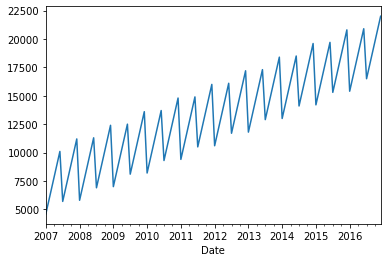

In [20]:
df["Sales"].plot()

/home/varunmuriyanat/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


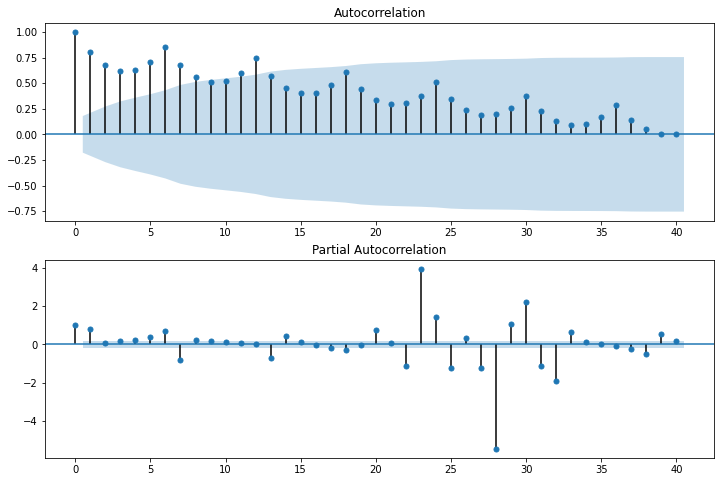

In [21]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales'], lags=40, ax=ax2)
plt.show()

In [31]:
import statsmodels.api as sm

In [32]:
print(sm.tsa.stattools.adfuller(df["Sales"]))

(-1.7925426110915772, 0.38417031519631467, 13, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, -5350.040922143996)


In [34]:
model=sm.tsa.ARIMA(endog=df['Sales'],order=(0,1,6))
results=model.fit()
print(results.summary())

/home/varunmuriyanat/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/varunmuriyanat/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  119
Model:                 ARIMA(0, 1, 6)   Log Likelihood               -1002.613
Method:                       css-mle   S.D. of innovations           1011.299
Date:                Thu, 12 Nov 2020   AIC                           2021.226
Time:                        09:19:49   BIC                           2043.459
Sample:                    02-01-2007   HQIC                          2030.254
                         - 12-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           101.6076      4.979     20.407      0.000      91.849     111.366
ma.L1.D.Sales    -0.5296      0.068     -7.826      0.000      -0.662      -0.397
ma.L2.D.Sales    -0.2231      0.063     

/home/varunmuriyanat/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


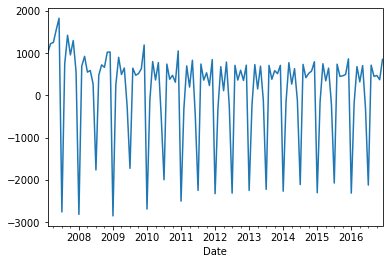

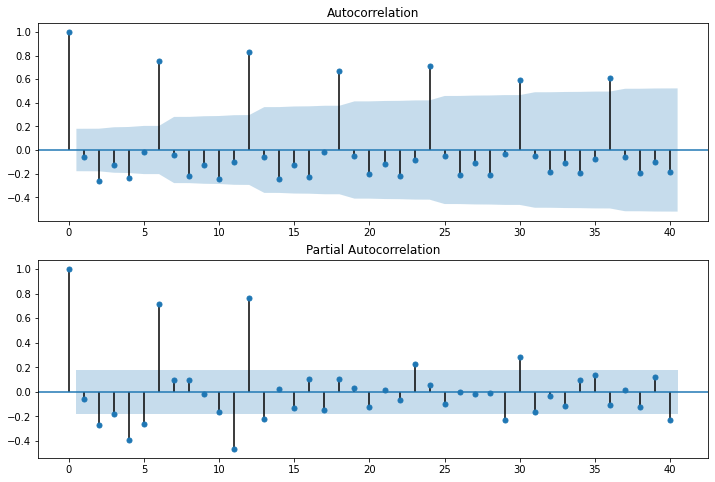

In [41]:
results.resid.plot()
plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()

In [43]:
forecast, std, conf = results.forecast(12)

In [46]:
len(forecast)

12

In [44]:
forecast, std, conf

(array([18766.4907432 , 18889.04120414, 18733.53401871, 18918.27328842,
        18938.52073345, 19886.56206146, 19988.16964236, 20089.77722327,
        20191.38480418, 20292.99238508, 20394.59996599, 20496.20754689]),
 array([1011.29856906, 1117.61906191, 1145.2763673 , 1161.85017576,
        1235.81941494, 1562.84097966, 1563.79536176, 1564.74916176,
        1565.70238072, 1566.6550197 , 1567.60707976, 1568.55856195]),
 array([[16784.38197022, 20748.59951618],
        [16698.54809436, 21079.53431391],
        [16488.83358646, 20978.23445096],
        [16641.0887885 , 21195.45778834],
        [16516.35918877, 21360.68227812],
        [16823.45002775, 22949.67409516],
        [16923.18705412, 23053.15223061],
        [17022.92522138, 23156.62922516],
        [17122.66452746, 23260.10508089],
        [17222.40497027, 23363.57979989],
        [17322.14654775, 23467.05338422],
        [17421.88925783, 23570.52583596]]))

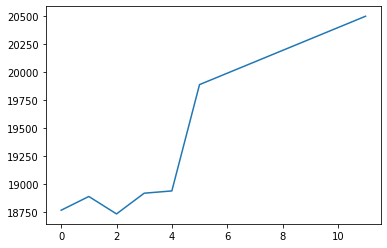

In [45]:
plt.plot(forecast)

In [40]:
df["Sales"].describe()

count      120.000000
mean     13300.000000
std       3980.414235
min       4600.000000
25%      10300.000000
50%      13300.000000
75%      16300.000000
max      22000.000000
Name: Sales, dtype: float64

In [37]:
model2=sm.tsa.ARIMA(endog=df['Sales'],order=(7,1,0))

/home/varunmuriyanat/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/varunmuriyanat/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [38]:
results2=model2.fit()

ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [36]:
model2=sm.tsa.ARIMA(endog=df['Sales'],order=(7,1,0))
results2=model2.fit()
print(results2.summary())
results2.resid.plot()
plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results2.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results2.resid, lags=40, ax=ax2)
plt.show()

/home/varunmuriyanat/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/varunmuriyanat/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [47]:
model2=sm.tsa.ARIMA(endog=df['Sales'], order=(7,1,0))
results2=model2.fit()
print(results2.summary())

/home/varunmuriyanat/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/varunmuriyanat/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [33]:
sm.tsa.stattools.adfuller?